# Score vs N

In this notebook we plot the score, # of tests, # of FPs and # of FNs for several values of N. 

In [1]:
import os
os.chdir("../")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import glob
import json
from src import utils
from src.utils import get_fig_dim
from IPython.display import clear_output
sns.set_theme(context='paper', style='ticks', font_scale=1)

In [3]:
name="score_vs_d"
se=0.8
sp=0.98
width_pt = 469
palette = sns.color_palette('husl', 6)
type_dict = {
    'false_negatives' : int,
    'false_positives' : int,
    'k' : float,
    'd' : float,
    'lambda_1' : float,
    'lambda_2' : float,
    'method' : str,
    'avg_group_size' : float,
    'num_of_infected' : int,
    'num_of_tests' : int,
    'r' : float,
    'N' : int,
    'score' : float,
    'se' : float,
    'sp' : float,
    'seed' : int
}

In [4]:
files = glob.glob("./outputs/{name}_*_se_{se}_sp_{sp}_*.json".format(name=name, se=se, sp=sp))

dicts = []
for fl_id, fl in enumerate(files):
    clear_output(wait=True)
    print('Reading file ' + str(fl_id+1)+'/'+str(len(files)))
    with open(fl,"r") as f:
        js = json.load(f)
        sizes = []
        for group_id in js['groups']:
            sizes.append(int(js['groups'][group_id]))

        avg_group_size = np.mean(sizes)
        
        for seed in js['seeds']:
            seed_js = js.copy()
            seed_js.pop('seeds', None)
            seed_js.pop('groups', None)    
            seed_js = seed_js | js['seeds'][seed]
            seed_js['seed']=seed
            seed_js['avg_group_size'] = avg_group_size

            dicts.append(seed_js)

input_df = pd.DataFrame(dicts)

Reading file 202/202


In [5]:
total_df = input_df.astype(type_dict) # Fix types
total_df = total_df.rename(columns={'num_of_tests' : 'tests', 'false_negatives' : 'FNs', 'avg_group_size' : 'size'}) # Rename columns
# total_df = total_df.replace({'num_of_tests': 'tests'}) # Rename methods
# test = total_df[total_df['method']=='negbin']
# test['d'].min()

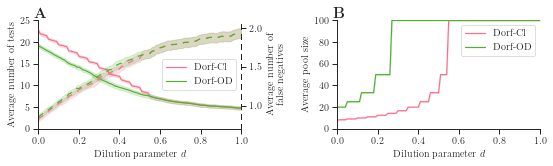

In [6]:
utils.latexify(font_size=10)

fig_height, fig_aspect = get_fig_dim(width_pt, fraction=0.6)
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(2*fig_height*fig_aspect,fig_height))
ax12 = ax1.twinx()

# Axis 1

sns.lineplot(data=total_df, x="d", y="tests", hue="method", palette=[palette[0]]+[palette[2]], hue_order=['binomial', 'negbin'], ci=95, ax=ax1)
sns.lineplot(data=total_df, x="d", y="FNs", hue="method", palette=[palette[0]]+[palette[2]], hue_order=['binomial', 'negbin'], legend=False, linestyle=(0,(5,5)), ci=70, ax=ax12)#, label=r'$\lambda_1 = 0$')
sns.despine(ax=ax1, top=True, right=False)
sns.despine(ax=ax12, top=True, right=False)
ax1.spines['right'].set_linestyle((0,(5,5)))
ax12.spines['right'].set_linestyle((0,(5,5)))

ax1.set_xlabel(r'Dilution parameter $d$')
ax1.set_ylabel('Average number of tests')
ax12.set_ylabel('Average number of\nfalse negatives')

ax1.legend(labels=['Dorf-Cl', 'Dorf-OD'], loc='center right')
ax1.set_xlim([0,1])
ax1.set_ylim([0,25])
ax12.set_ylim([0.7,2.1])
ax1.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])

ax1.text(x=0.01, y=1, s=r'\textbf{A}', size=15, transform = ax1.transAxes, horizontalalignment='center', verticalalignment='bottom')

# Axis 2

sns.lineplot(data=total_df, x="d", y="size", hue="method", palette=[palette[0]]+[palette[2]], hue_order=['binomial', 'negbin'], ci=95, ax=ax2)
sns.despine(ax=ax2)

ax2.set_xlabel(r'Dilution parameter $d$')
ax2.set_ylabel('Average pool size')

ax2.legend(labels=['Dorf-Cl', 'Dorf-OD'])
ax2.set_xlim([0,1])
ax2.set_ylim([0,100])
ax2.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])

ax2.text(x=0.01, y=1, s=r'\textbf{B}', size=15, transform = ax2.transAxes, horizontalalignment='center', verticalalignment='bottom')

fig.tight_layout()
# fig.savefig('figures/{name}_se_{se}_sp_{sp}.pdf'.format(name=name, se=se, sp=sp))
fig.savefig('figures/sci-adv-fig4.pdf')